<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/outliers_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [3]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())
data['spirit_servings']=data['spirit_servings'].fillna(data['spirit_servings'].median())
data['wine_servings']=data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol']=data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

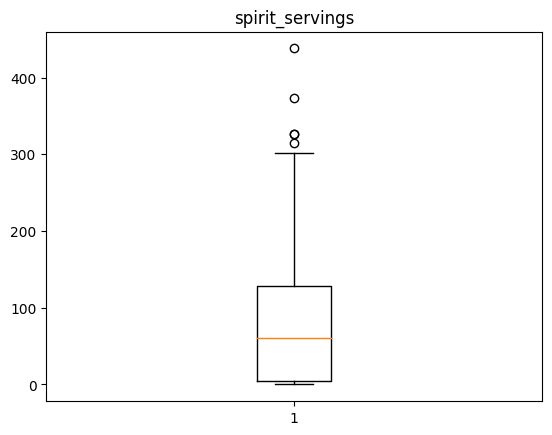

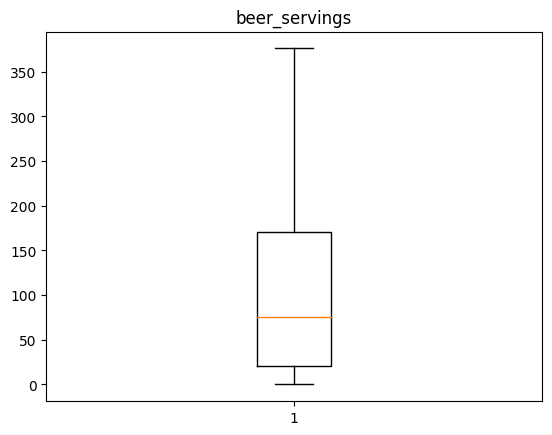

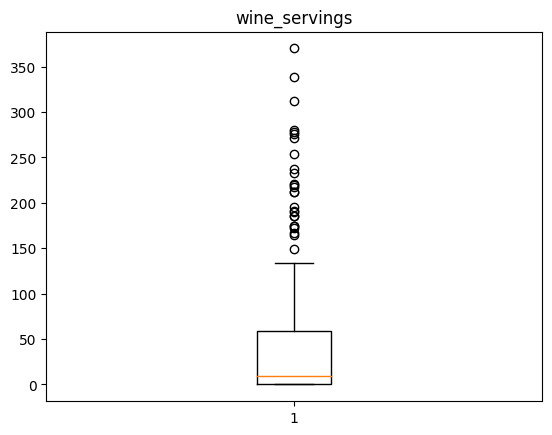

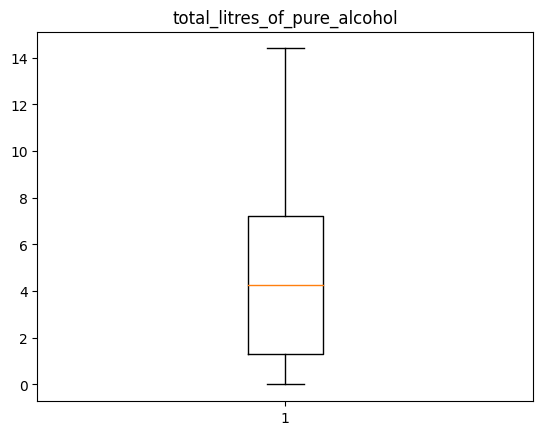

In [4]:
num_cols={'beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'}
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [5]:
#Remove Outliers from Wine Servings
Q1=np.percentile(data['wine_servings'],25,method='midpoint')
Q2=np.percentile(data['wine_servings'],50,method='midpoint')
Q3=np.percentile(data['wine_servings'],75,method='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)

Q1 is 1.0
Q2 is 9.0
Q3 is 59.0


In [6]:
iqr=Q3-Q1
iqr

58.0

In [7]:
low_limit= Q1 - 1.5 * iqr
upp_limit= Q3 + 1.5 * iqr
print('lower limit :',low_limit)
print('Upper limit :',upp_limit)

lower limit : -86.0
Upper limit : 146.0


In [8]:
outliers=[]
for x in data['wine_servings']:
  if((x > upp_limit) or (x <low_limit)):
    outliers.append(x)
outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [12]:
data['wine_servings'] = data['wine_servings'].clip(lower=low_limit , upper=upp_limit)

In [14]:
outlier=[]
for x in data['wine_servings']:
  if((x > upp_limit) or (x < low_limit)):
    outlier.append(x)

outlier

[]

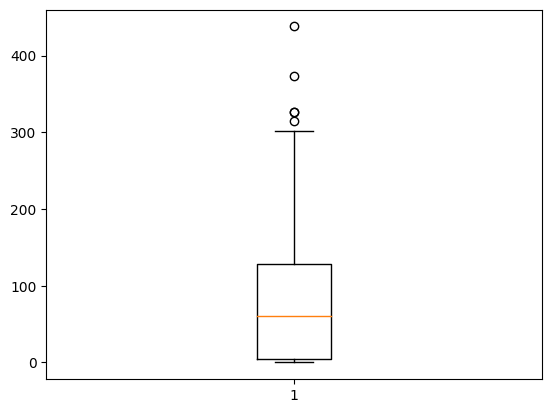

In [15]:
plt.boxplot(data['spirit_servings'])
plt.show();